In [1]:
import numpy as np
from scipy.linalg import eig, inv, cholesky
from OU_simulation import *
from Policy_Gradient_agent import *
from TD3 import *
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.integrate import odeint
%reload_ext autoreload
%autoreload 2

In [19]:
import pickle
from QR_DQN import RQ_DQN_train
from MDQN   import MDQN_train
from TD3    import TD3_train

timesteps = 200000

N = 1       # assets
L = 1000    # timesteps 
T = 40      # final time T

r = 0.0
p  = np.ones((N,1)) #simplification in this model the asset prices themselves are assumed to be mean reverting
tc = 0.01

# QR_DQN_agents = list()
# MDQN_agents   = list()
# TD3_agents    = list()

# perf_QR_DQN   = list()
# perf_MDQN   = list()
# perf_TD3   = list()


for test, tc in enumerate([0.0, 0.002,0.006,0.01]): 
    print(test)
    process = OU_process_shuffler(N,T,L)
    env = TradingEnvironment(process,T,r,p,mode='portfolio', max_pi=1, max_change=1,initial_wealth=0, transaction_costs=tc)

    agent_RQ_DQN, history_RQ_DQN = RQ_DQN_train(env, timesteps)
    agent_MDQN, history_MDQN = MDQN_train(env,timesteps)
    agent_TD3, history_TD3 = TD3_train(env, timesteps)
    
    perf_QR_DQN.append(history_RQ_DQN)
    perf_MDQN.append(history_MDQN)
    perf_TD3.append(history_TD3)

    QR_DQN_agents.append(agent_RQ_DQN)
    MDQN_agents.append(agent_MDQN)
    TD3_agents.append(agent_TD3)

    # dbfile = open('RQ_DQN', 'wb')
    # # source, destination
    # pickle.dump(perf_RQ_DQN, dbfile)                    
    # dbfile.close()

    # dbfile = open('MDQN', 'wb')
    # # source, destination
    # pickle.dump(perf_MDQN, dbfile)                    
    # dbfile.close()

    # dbfile = open('TD3', 'wb')
    # # source, destination
    # pickle.dump(perf_TD3, dbfile)                    
    # dbfile.close()

0
Using  cpu


/opt/anaconda3/envs/deep_learning/lib/python3.8/site-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(


Episode 100	Frame 99900	Average Score: 1.722
Episode 200	Frame 199800	Average Score: 2.011
Using  cpu
Episode 100	Frame 99900	Average Score: 1.522
Episode 200	Frame 199800	Average Score: 2.277
cpu
Episode 100	Frame 99994	Average Score: 2.111
Episode 200	Frame 199994	Average Score: 2.455
1
Using  cpu
Episode 100	Frame 99900	Average Score: 1.288
Episode 200	Frame 199800	Average Score: 1.766
Using  cpu
Episode 100	Frame 99900	Average Score: 1.000
Episode 200	Frame 199800	Average Score: 2.333
cpu
Episode 100	Frame 99994	Average Score: 2.322
Episode 200	Frame 199994	Average Score: 2.322
2
Using  cpu
Episode 100	Frame 99900	Average Score: 0.277
Episode 200	Frame 199800	Average Score: 1.055
Using  cpu
Episode 100	Frame 99900	Average Score: 0.244
Episode 200	Frame 199800	Average Score: 1.200
cpu
Episode 100	Frame 99994	Average Score: 1.944
Episode 200	Frame 199994	Average Score: 1.755


In [42]:
process = OU_process_shuffler(N,T,L)
env = TradingEnvironment(process,T,r,p,mode='portfolio', max_pi=1, max_change=1,initial_wealth=0, transaction_costs=tc)

Text(102.90277777777779, 0.5, '$W_t$')

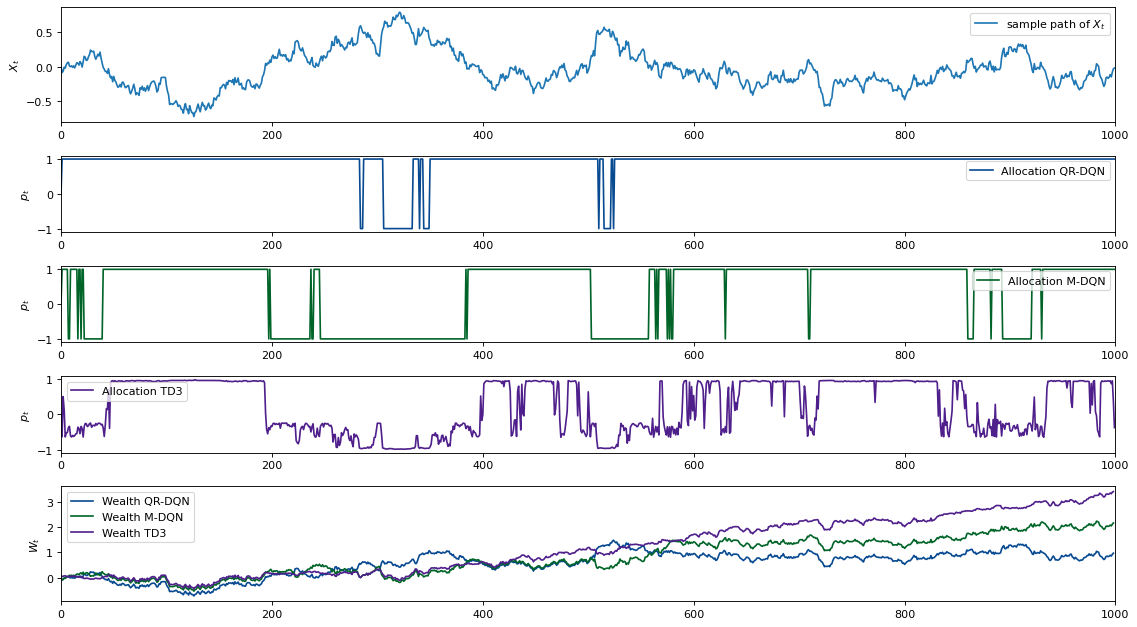

In [133]:
agent_num = 0
tc = 0.0

process = ornstein_uhlenbeck_process(theta=np.array([[0.5]]), mu=np.array([[0]]), sigma=np.array([[0.25]]),delta_t=0.04)
env = TradingEnvironment(process,T,r,p,mode='portfolio', max_pi=1, max_change=1,initial_wealth=0, transaction_costs=tc)

action_to_portfolio = {0:-1, 1:0, 2: 1}

fig, ax = plt.subplots(5,1,figsize=(14,8),dpi=80,gridspec_kw={'height_ratios': [1.5, 1,1,1, 1.5]})

fig.tight_layout()

#QR-DQN
seed = 100 #np.random.randint(0,100000)# 111
torch.manual_seed(seed)
np.random.seed(seed)
state, _ = env.reset(seed=seed)
env.seed(seed)
env.action_space.seed(seed)

done = False
val_predictions = []

done = False
val_predictions = []
while not done:
    #state = torch.FloatTensor(state[:N]).unsqueeze(0)
    state = dict_to_features(state)
    #action = policy.select_action(np.array(state))
    action  = QR_DQN_agents[agent_num].act(state)
    #val_predictions.append(value_pred.detach().item())
    state, reward, done, _ = env.step([action_to_portfolio[action]])
QR_W = env.W
QR_alloc = env.alloc
ax[0].plot(env.X.transpose())

# M-DQN
torch.manual_seed(seed)
np.random.seed(seed)
state, _ = env.reset(seed=seed)
env.seed(seed)
env.action_space.seed(seed)

done = False
val_predictions = []

done = False
val_predictions = []
while not done:
    #state = torch.FloatTensor(state[:N]).unsqueeze(0)
    state = dict_to_features(state)
    #action = policy.select_action(np.array(state))
    action  = MDQN_agents[agent_num].act(state)
    #val_predictions.append(value_pred.detach().item())
    state, reward, done, _ = env.step([action_to_portfolio[action]])

MDQN_W = env.W
MDQN_alloc = env.alloc

# TD3
torch.manual_seed(seed)
np.random.seed(seed)
state, _ = env.reset(seed=seed)
env.seed(seed)
env.action_space.seed(seed)

done = False
val_predictions = []

done = False
val_predictions = []
while not done:
    #state = torch.FloatTensor(state[:N]).unsqueeze(0)
    state = dict_to_features(state)

    action = TD3_agents[agent_num].select_action(np.array(state))
    #val_predictions.append(value_pred.detach().item())
    state, reward, done, _ = env.step(action)

TD3_W = env.W
TD3_alloc = env.alloc

#fig.suptitle(fr'One asset reinforcement learning agent $\theta$: {env.process.theta.item()}, $\sigma$: {env.process.sigma.item()}', fontsize=16, y = 0.97)
fig.suptitle('')
# plot a sample path of the wealth

#ax[0].set_title(r'sample path of $X_t$')
ax[0].legend([r'sample path of $X_t$'])
ax[0].set_ylabel(r'$X_t$')
ax[0].set_xlim([0,1000])

#ax[0].set_xlabel('Time')
ax[1].plot(np.array(QR_alloc).sum(axis=0).reshape(-1),color=plt.cm.Blues(0.9))
ax[1].legend(['Allocation QR-DQN'])
ax[1].set_ylabel(r'$p_t$')
ax[1].set_xlim([0,1000])

ax[2].plot(np.array(MDQN_alloc).sum(axis=0).reshape(-1), color=plt.cm.Greens(0.9))
#ax[2].set_title(r'Allocation of M-DQN')
ax[2].set_ylabel(r'$p_t$')
ax[2].legend(['Allocation M-DQN'])
ax[2].set_xlim([0,1000])

ax[3].plot(np.array(TD3_alloc).sum(axis=0).reshape(-1), color=plt.cm.Purples(0.9))
#ax[3].set_title(r'Allocation of TD3')
ax[3].set_ylabel(r'$p_t$')
ax[3].legend(['Allocation TD3'])
ax[3].set_xlim([0,1000])

ax[4].plot(QR_W[:-1], color = plt.cm.Blues(0.9))
ax[4].plot(MDQN_W[:-1], color=plt.cm.Greens(0.9))
ax[4].plot(TD3_W[:-1], color=plt.cm.Purples(0.9))
#ax[4].set_title(r'Agent wealth evolution')
ax[4].legend(['Wealth QR-DQN','Wealth M-DQN','Wealth TD3'])
ax[4].set_xlim([0,1000])
ax[4].set_ylabel(r'$W_t$')
#ax[4].set_ylim([-0.5,3.5])

Text(102.90277777777779, 0.5, '$W_t$')

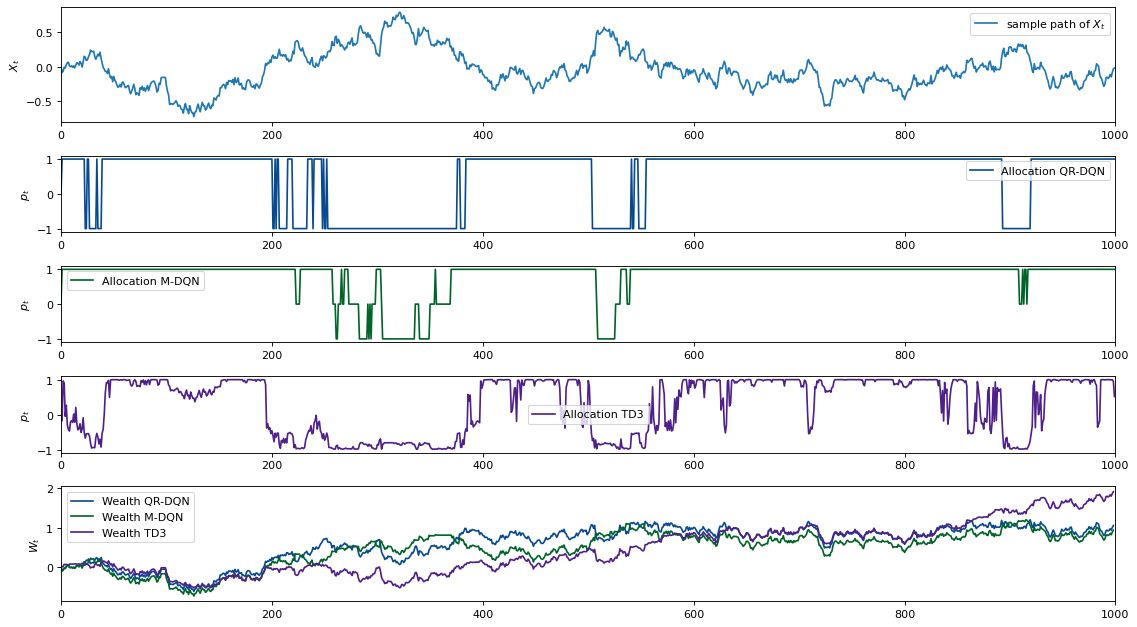

In [134]:
agent_num = 3
tc = 0.01

process = ornstein_uhlenbeck_process(theta=np.array([[0.5]]), mu=np.array([[0]]), sigma=np.array([[0.25]]),delta_t=0.04)
env = TradingEnvironment(process,T,r,p,mode='portfolio', max_pi=1, max_change=1,initial_wealth=0, transaction_costs=tc)

action_to_portfolio = {0:-1, 1:0, 2: 1}

fig, ax = plt.subplots(5,1,figsize=(14,8),dpi=80,gridspec_kw={'height_ratios': [1.5, 1,1,1, 1.5]})

fig.tight_layout()

#QR-DQN
seed = 100 #np.random.randint(0,100000)# 111
torch.manual_seed(seed)
np.random.seed(seed)
state, _ = env.reset(seed=seed)
env.seed(seed)
env.action_space.seed(seed)

done = False
val_predictions = []

done = False
val_predictions = []
while not done:
    #state = torch.FloatTensor(state[:N]).unsqueeze(0)
    state = dict_to_features(state)
    #action = policy.select_action(np.array(state))
    action  = QR_DQN_agents[agent_num].act(state)
    #val_predictions.append(value_pred.detach().item())
    state, reward, done, _ = env.step([action_to_portfolio[action]])
QR_W = env.W
QR_alloc = env.alloc
ax[0].plot(env.X.transpose())

# M-DQN
torch.manual_seed(seed)
np.random.seed(seed)
state, _ = env.reset(seed=seed)
env.seed(seed)
env.action_space.seed(seed)

done = False
val_predictions = []

done = False
val_predictions = []
while not done:
    #state = torch.FloatTensor(state[:N]).unsqueeze(0)
    state = dict_to_features(state)
    #action = policy.select_action(np.array(state))
    action  = MDQN_agents[agent_num].act(state)
    #val_predictions.append(value_pred.detach().item())
    state, reward, done, _ = env.step([action_to_portfolio[action]])

MDQN_W = env.W
MDQN_alloc = env.alloc

# TD3
torch.manual_seed(seed)
np.random.seed(seed)
state, _ = env.reset(seed=seed)
env.seed(seed)
env.action_space.seed(seed)

done = False
val_predictions = []

done = False
val_predictions = []
while not done:
    #state = torch.FloatTensor(state[:N]).unsqueeze(0)
    state = dict_to_features(state)

    action = TD3_agents[agent_num].select_action(np.array(state))
    #val_predictions.append(value_pred.detach().item())
    state, reward, done, _ = env.step(action)

TD3_W = env.W
TD3_alloc = env.alloc

#fig.suptitle(fr'One asset reinforcement learning agent $\theta$: {env.process.theta.item()}, $\sigma$: {env.process.sigma.item()}', fontsize=16, y = 0.97)
fig.suptitle('')
# plot a sample path of the wealth

#ax[0].set_title(r'sample path of $X_t$')
ax[0].legend([r'sample path of $X_t$'])
ax[0].set_ylabel(r'$X_t$')
ax[0].set_xlim([0,1000])

#ax[0].set_xlabel('Time')
ax[1].plot(np.array(QR_alloc).sum(axis=0).reshape(-1),color=plt.cm.Blues(0.9))
ax[1].legend(['Allocation QR-DQN'])
ax[1].set_ylabel(r'$p_t$')
ax[1].set_xlim([0,1000])

ax[2].plot(np.array(MDQN_alloc).sum(axis=0).reshape(-1), color=plt.cm.Greens(0.9))
#ax[2].set_title(r'Allocation of M-DQN')
ax[2].set_ylabel(r'$p_t$')
ax[2].legend(['Allocation M-DQN'])
ax[2].set_xlim([0,1000])

ax[3].plot(np.array(TD3_alloc).sum(axis=0).reshape(-1), color=plt.cm.Purples(0.9))
#ax[3].set_title(r'Allocation of TD3')
ax[3].set_ylabel(r'$p_t$')
ax[3].legend(['Allocation TD3'])
ax[3].set_xlim([0,1000])

ax[4].plot(QR_W[:-1], color = plt.cm.Blues(0.9))
ax[4].plot(MDQN_W[:-1], color=plt.cm.Greens(0.9))
ax[4].plot(TD3_W[:-1], color=plt.cm.Purples(0.9))
#ax[4].set_title(r'Agent wealth evolution')
ax[4].legend(['Wealth QR-DQN','Wealth M-DQN','Wealth TD3'])
ax[4].set_xlim([0,1000])
ax[4].set_ylabel(r'$W_t$')
#ax[4].set_ylim([-0.5,3.5])

In [157]:
x_test      = np.linspace(-0.75,0.75,100)
states_test = np.zeros((4,100))
states_test[0,:] = x_test
states_test[1,:] = 0.0
states_test[2,:] = 0.25   # sigma
states_test[3,:] = 0.5  #theta #np.linspace(0,1,100)

Text(137.59722222222223, 0.5, 'chosen allocation $p_t$')

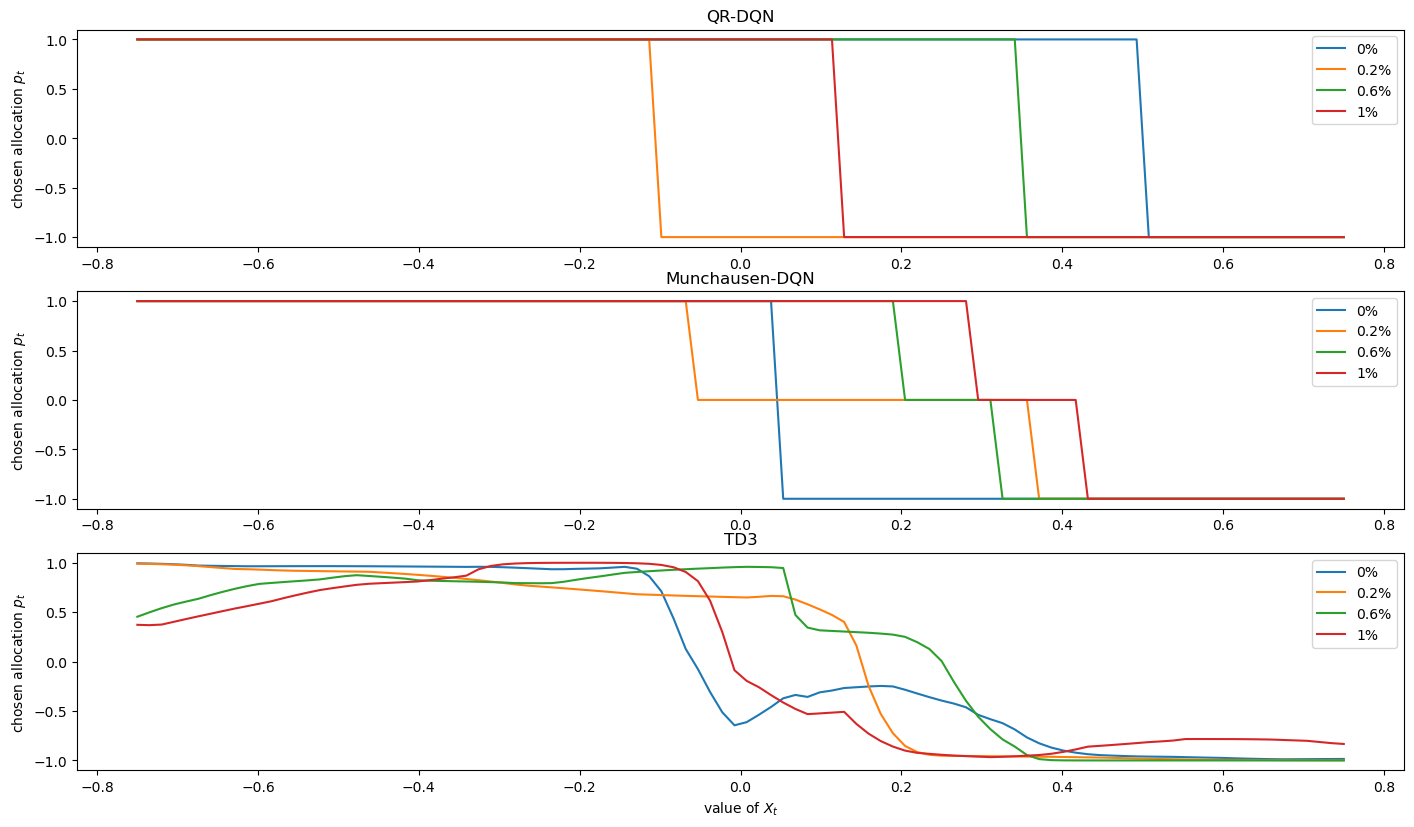

In [158]:

fig, ax = plt.subplots(3,1,figsize=(14,8),dpi=100)
plt.tight_layout()

ax[1].set_title('Munchausen-DQN')
ax[1].plot(x_test, np.argmax(MDQN_agents[0].qnetwork_local(torch.FloatTensor(states_test.T)).detach().numpy(),axis=1)-1)
ax[1].plot(x_test, np.argmax(MDQN_agents[1].qnetwork_local(torch.FloatTensor(states_test.T)).detach().numpy(),axis=1)-1)
ax[1].plot(x_test, np.argmax(MDQN_agents[2].qnetwork_local(torch.FloatTensor(states_test.T)).detach().numpy(),axis=1)-1)
ax[1].plot(x_test, np.argmax(MDQN_agents[3].qnetwork_local(torch.FloatTensor(states_test.T)).detach().numpy(),axis=1)-1)
ax[1].legend(['0%','0.2%','0.6%', '1%'])

ax[2].set_title('TD3')
ax[2].plot(x_test, TD3_agents[0].actor(torch.FloatTensor(states_test.T)).detach().numpy())
ax[2].plot(x_test, TD3_agents[1].actor(torch.FloatTensor(states_test.T)).detach().numpy())
ax[2].plot(x_test, TD3_agents[2].actor(torch.FloatTensor(states_test.T)).detach().numpy())
ax[2].plot(x_test, TD3_agents[3].actor(torch.FloatTensor(states_test.T)).detach().numpy())
ax[2].legend(['0%','0.2%','0.6%', '1%'])

ax[0].set_title('QR-DQN')
ax[2].set_xlabel(r'value of $X_t$')
ax[0].plot(x_test, np.argmax(QR_DQN_agents[0].qnetwork_local(torch.FloatTensor(states_test.T)).detach().numpy().mean(axis=1),axis=1)-1)
ax[0].plot(x_test, np.argmax(QR_DQN_agents[1].qnetwork_local(torch.FloatTensor(states_test.T)).detach().numpy().mean(axis=1),axis=1)-1)
ax[0].plot(x_test, np.argmax(QR_DQN_agents[2].qnetwork_local(torch.FloatTensor(states_test.T)).detach().numpy().mean(axis=1),axis=1)-1)
ax[0].plot(x_test, np.argmax(QR_DQN_agents[3].qnetwork_local(torch.FloatTensor(states_test.T)).detach().numpy().mean(axis=1),axis=1)-1)
ax[0].legend(['0%','0.2%','0.6%', '1%'])

ax[0].set_ylabel(r'chosen allocation $p_t$')
ax[1].set_ylabel(r'chosen allocation $p_t$')
ax[2].set_ylabel(r'chosen allocation $p_t$')